In [2]:
# https://www.youtube.com/watch?v=Q_MbN-vu_2w&list=PLaTc2c6yEwmotOgH9PIBpLf3CZEXdD41q&ab_channel=todaycode%EC%98%A4%EB%8A%98%EC%BD%94%EB%93%9C

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# to draw the graph in jupyter notebook
%matplotlib inline

# to use grid style background in plots
plt.style.use('ggplot')

# mpl.rcParams['axes.unicode_minus'] = False

In [3]:
train_data = pd.read_csv('./data/train.csv', parse_dates=["datetime"])

In [4]:
train_data.shape

(10886, 12)

In [5]:
print(train_data.columns)
print(train_data.dtypes)
train_data.info()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 

In [6]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train_data.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [8]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

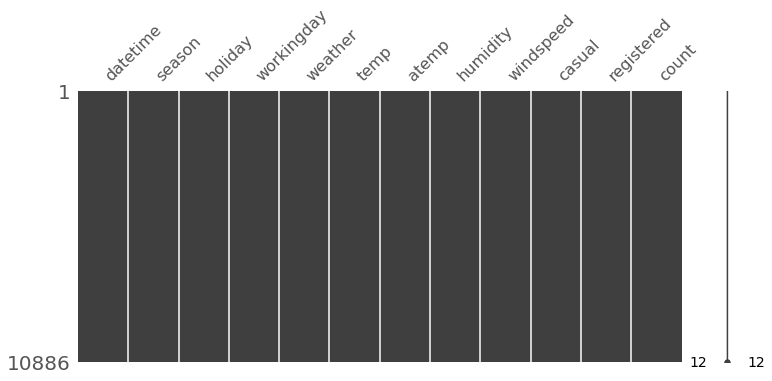

In [9]:
import missingno as msno

msno.matrix(train_data, figsize=(12,5))

In [10]:
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour
train_data['minute'] = train_data['datetime'].dt.minute
train_data['second'] = train_data['datetime'].dt.second

In [11]:
train_data.shape

(10886, 18)

In [12]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

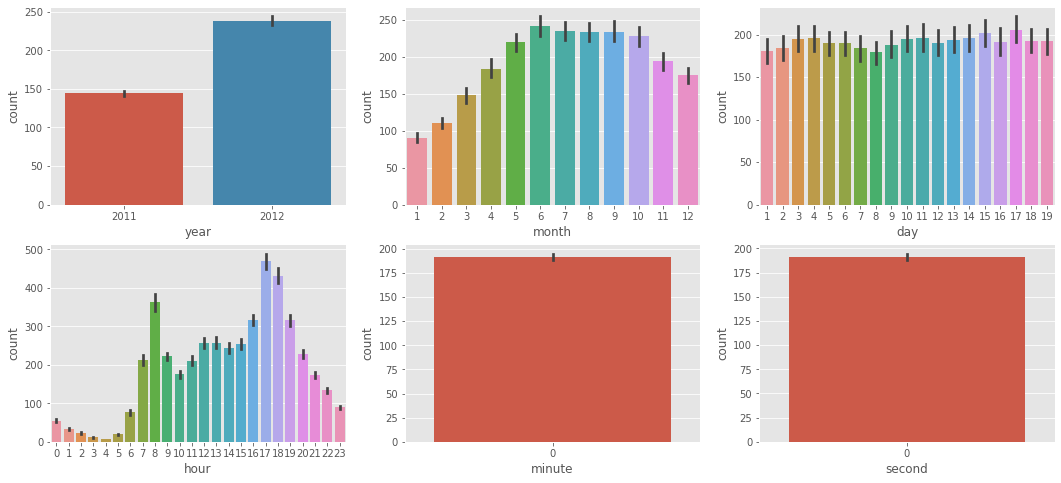

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18,8)

sns.barplot(data=train_data, x='year', y='count', ax=ax1)
sns.barplot(data=train_data, x='month', y='count', ax= ax2)
sns.barplot(data=train_data, x='day', y='count', ax=ax3)
sns.barplot(data=train_data, x='hour', y='count',ax=ax4)
sns.barplot(data=train_data, x='minute', y='count', ax=ax5)
sns.barplot(data=train_data, x='second', y='count', ax=ax6)


<AxesSubplot:xlabel='weather', ylabel='count'>

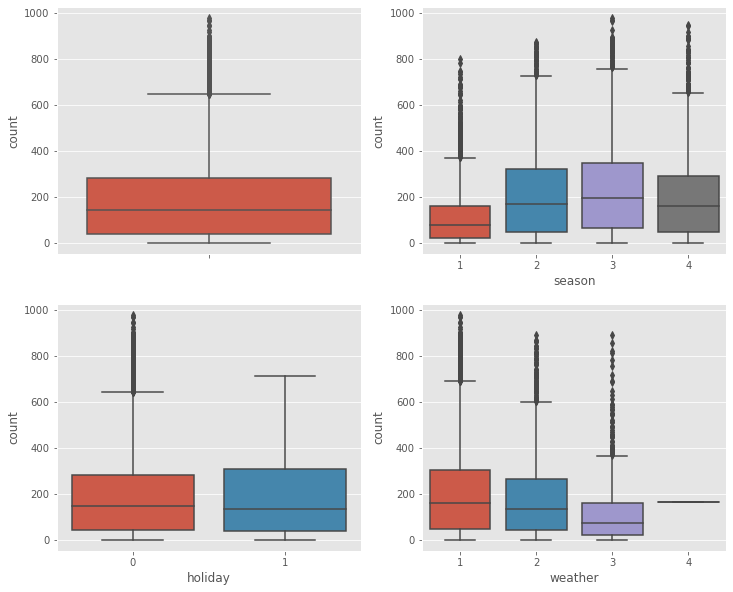

In [14]:
figure, axes = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(12, 10)

sns.boxplot(data=train_data, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train_data, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train_data, y='count', x='holiday', orient='v', ax=axes[1][0])
sns.boxplot(data=train_data, y='count', x='weather', orient='v', ax=axes[1][1])

In [15]:
train_data['dayofweek'] = train_data['datetime'].dt.dayofweek

In [16]:
train_data.shape

(10886, 19)

In [17]:
train_data['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

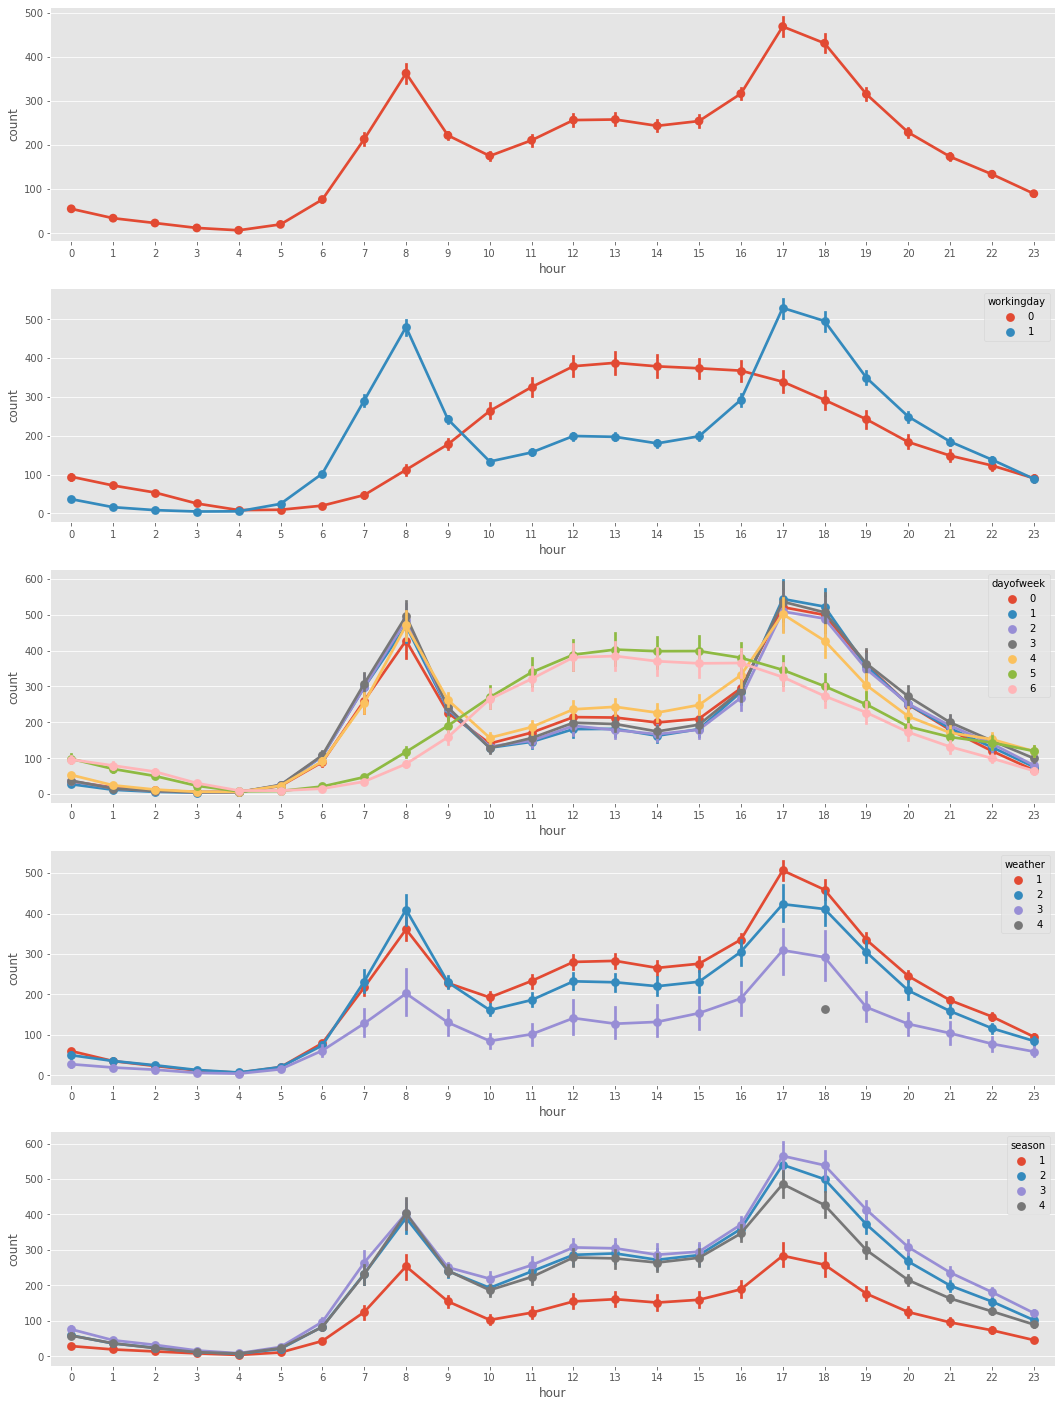

In [18]:
figure, axes = plt.subplots(nrows=5)

figure.set_size_inches(18,25)

sns.pointplot(data=train_data, x='hour', y='count', ax=axes[0])
sns.pointplot(data=train_data, x='hour', y='count', hue='workingday', ax=axes[1])
sns.pointplot(data=train_data, x='hour', y='count', hue='dayofweek', ax=axes[2])
sns.pointplot(data=train_data, x='hour', y='count', hue= 'weather', ax=axes[3])
sns.pointplot(data=train_data, x='hour', y='count', hue='season', ax=axes[4])

In [19]:
corrMat = train_data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed','count']]
corrMat = corrMat.corr()

In [20]:
print(corrMat)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


In [21]:
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False

In [22]:
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<AxesSubplot:>

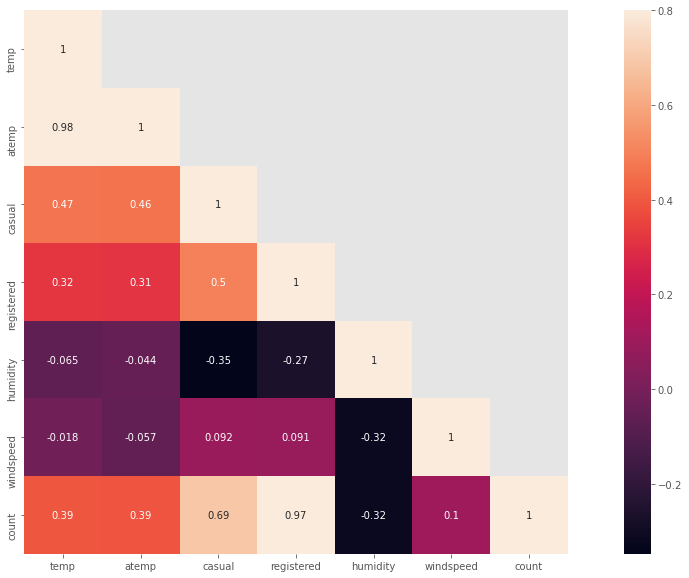

In [23]:
figure, ax = plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corrMat, mask=mask, vmax=.8, square=True, annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

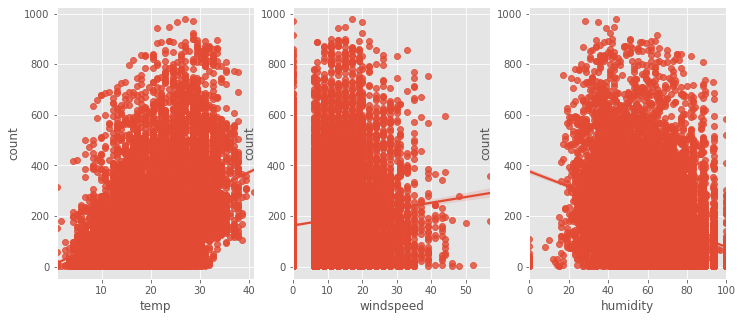

In [24]:
figure, (ax1, ax2, ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12, 5)

sns.regplot(x='temp', y='count', data=train_data, ax= ax1)
sns.regplot(x='windspeed', y='count', data=train_data, ax=ax2)
sns.regplot(x='humidity', y='count', data=train_data, ax=ax3)

In [26]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train_data["year_month"] = train_data["datetime"].apply(concatenate_year_month)

<AxesSubplot:xlabel='month', ylabel='count'>

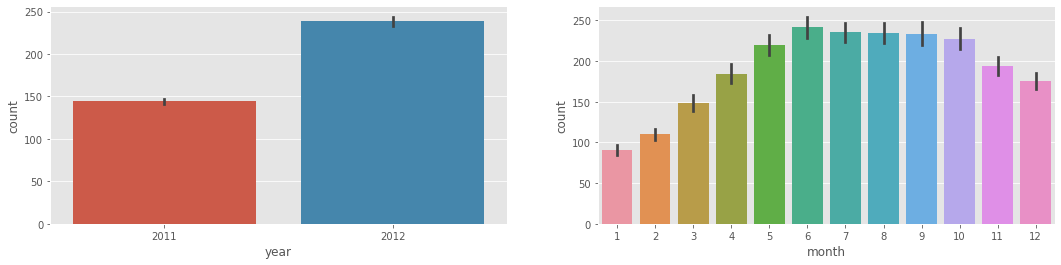

In [27]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train_data, x='year', y='count', ax=ax1)
sns.barplot(data=train_data, x='month', y='count', ax=ax2)

<AxesSubplot:xlabel='year_month', ylabel='count'>

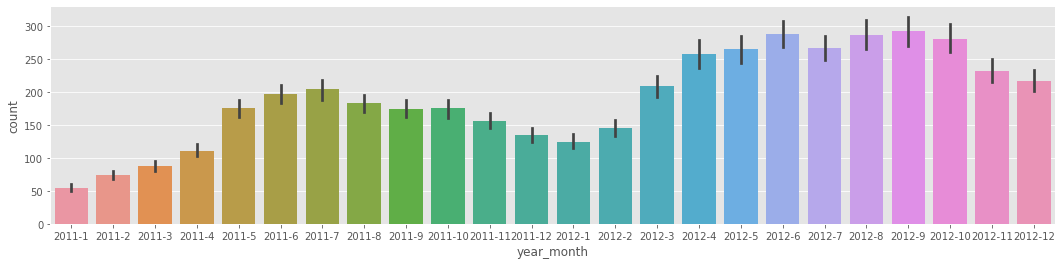

In [28]:
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=train_data, x='year_month', y='count', ax=ax3)


In [31]:

# remove outliers that are out of 95% confidence interval
trainWithoutOutliers = train_data[np.abs(train_data['count'] - train_data['count'].mean()) <= 3*train_data['count'].std()]

In [34]:
print(train_data.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


/Users/dyhan/miniconda3/envs/study_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dyhan/miniconda3/envs/study_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.409684610154291, 4.523106928071492, 0.9537631807794263))

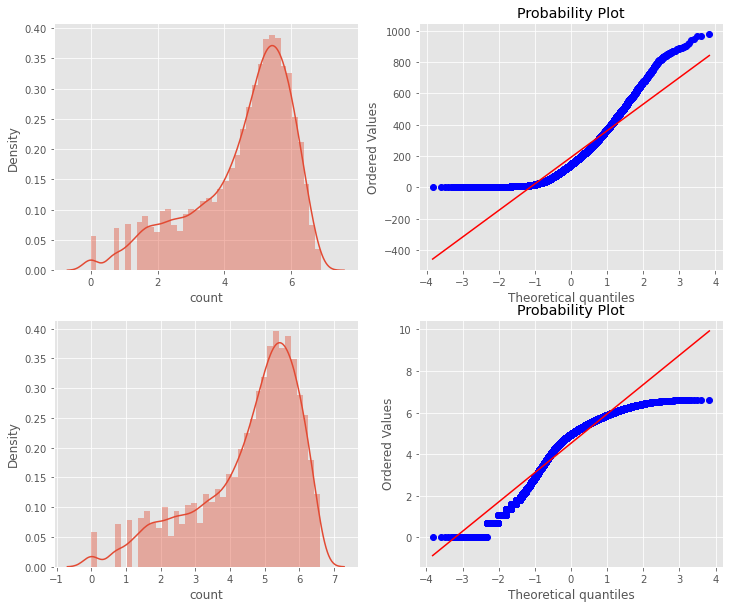

In [37]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train_data['count'], ax=ax1)
stats.probplot(train_data['count'], dist='norm', fit=True, plot=ax2)

sns.distplot(np.log(trainWithoutOutliers['count']), ax=ax3)
stats.probplot(np.log(trainWithoutOutliers['count']), dist='norm', fit=True, plot=ax4)